In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
# --- 1. Prepare Data ---
data = {
    'Size_sqft': [1500, 2000, 1200, 3500, 1800, 2500, 1000, 3000],
    'Age_years': [10, 5, 20, 2, 15, 8, 25, 3],
    'Price_k': [300, 450, 250, 650, 350, 550, 200, 600]
}
df = pd.DataFrame(data)

X = df[['Size_sqft', 'Age_years']]
y = df['Price_k']



In [3]:
# --- 2. Train the Model ---
model = LinearRegression()
model.fit(X, y)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [4]:
# --- 3. Create Meshgrid for the Prediction Plane ---
# Create an even grid of X1 (Size) and X2 (Age) values across the range of the data
size_min, size_max = X['Size_sqft'].min(), X['Size_sqft'].max()
age_min, age_max = X['Age_years'].min(), X['Age_years'].max()

# Generate 50 points evenly spaced between the min and max for each feature
size_range = np.linspace(size_min, size_max, 50)
age_range = np.linspace(age_min, age_max, 50)

# Create a meshgrid from the ranges (3D coordinates for the plane)
Size_Grid, Age_Grid = np.meshgrid(size_range, age_range)

# Prepare the grid data for prediction (must be in the same format as X)
Plane_Features = pd.DataFrame({
    'Size_sqft': Size_Grid.flatten(),
    'Age_years': Age_Grid.flatten()
})



In [5]:
# --- 4. Predict the Plane's Z-values (Price) ---
Price_Grid_flat = model.predict(Plane_Features)
# Reshape the predictions back into a 2D grid to plot the surface
Price_Grid = Price_Grid_flat.reshape(Size_Grid.shape)



multiple_regression_3d_plot.png


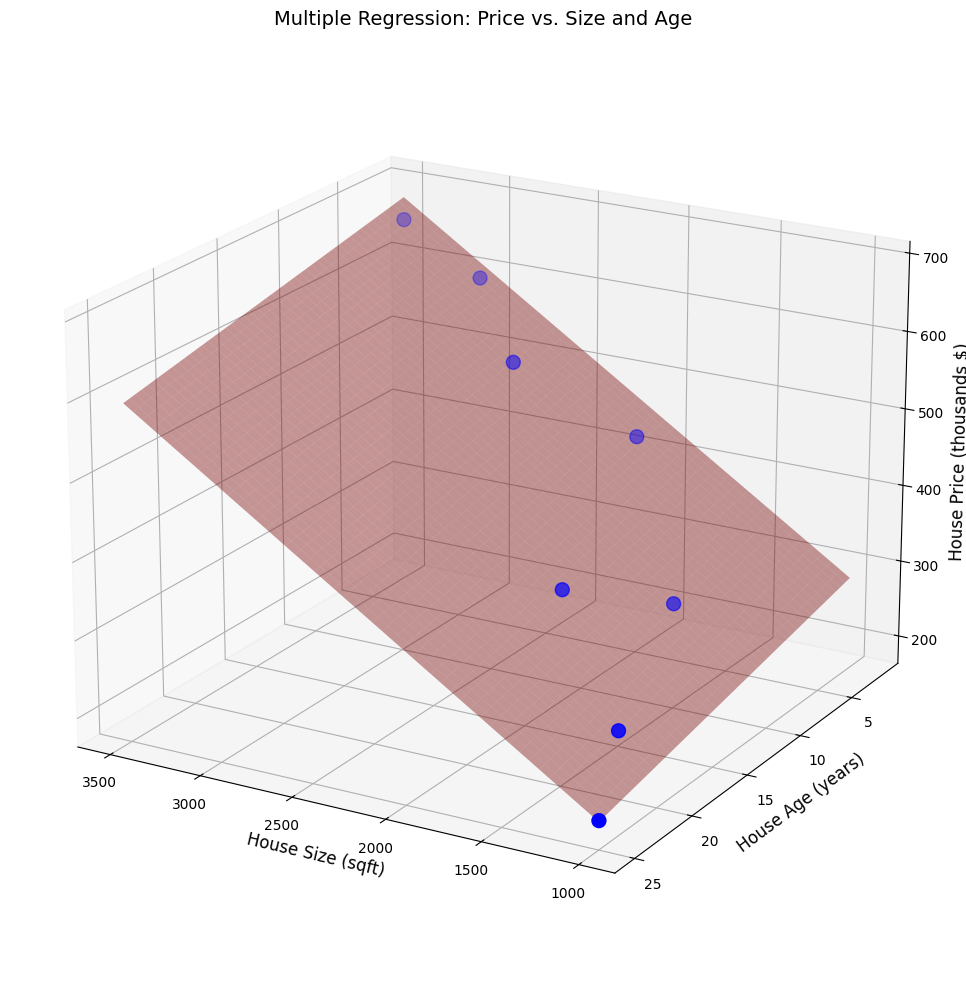

In [6]:
# --- 5. Visualize the Results in 3D ---
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points (scatter plot)
ax.scatter(df['Size_sqft'], df['Age_years'], df['Price_k'], 
           color='blue', marker='o', s=100, label='Actual Data Points')

# Plot the predicted regression plane (surface plot)
ax.plot_surface(Size_Grid, Age_Grid, Price_Grid, 
                alpha=0.4, color='red', label='Regression Plane')

# Set labels and title
ax.set_xlabel('House Size (sqft)', fontsize=12)
ax.set_ylabel('House Age (years)', fontsize=12)
ax.set_zlabel('House Price (thousands $)', fontsize=12)
ax.set_title('Multiple Regression: Price vs. Size and Age', fontsize=14)

# Enhance visualization
ax.view_init(elev=20, azim=120) # Adjust view angle for better visibility
fig.tight_layout()

print("multiple_regression_3d_plot.png")